# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
# Data manipulation
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm

from IPython import get_ipython
ipython = get_ipython()

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)

#import cufflinks as cf
#cf.go_offline(connected=True)
#cf.set_config_file(theme='white')


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

In [2]:
!head input.txt

9937913613489579689887899839718659949144483893874749858366681232699911196851919824197391598696712368
5253918396598241962985986992428814875993889428717557939529588827685169588381194992989482737895729941
4729891993659869351699195978189948897799346577498659736999269171689999888159836937748681169667242592
9129275987879292235985782771919198489164694932897317998799366818498649189196178854891125199749869194
9642428968649516499977253921652586978698849999177282414639999319775881939999474793794429627999449759
3457847685152919578737716725398145788592567819997119869941598848979848884979739759929987549138674446
1924959268497883988478799998486898967638863969799969998879997426283869935891217997963581576999477577
9769699291551983797285999741971583335129491688689659175393852969839311784996989187976976117111744989
8774389593493896722994716895989797954369988849881799329699172595587974241895375978516797413178898177
7757596139726268841787827266693945489711877479699669162337887298659971765291991176598619988

In [6]:
data = np.fromfile("input.txt",dtype='int8',).reshape((100,101))[:,:-1]-ord('0')

In [7]:
data.shape

(100, 100)

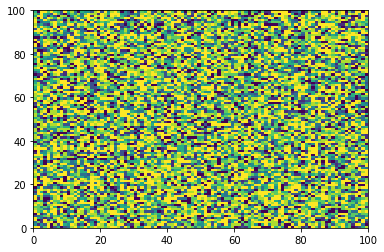

In [8]:
plt.pcolormesh(data)

In [24]:
visited = np.zeros(data.shape,dtype='bool')
tdist = np.ones(data.shape)*np.inf
tdist[0,0] = 0
current = (0,0)
while True:
    coords = []
    for cidx in [0,1]:
        this_coord = []
        if current[cidx] > 0:
            this_coord.append(current[cidx]-1)
        if current[cidx] < data.shape[cidx]-1:
            this_coord.append(current[cidx]+1)
        coords.append(this_coord)
    rows,cols = coords
    neighbors = []
    for row in rows:
        neighbors.append((row,current[1]))
    for col in cols:
        neighbors.append((current[0],col))
    for row,col in neighbors:
        if not visited[row,col]:
            new_dist = tdist[current[0],current[1]] + data[row,col]
            if new_dist < tdist[row,col]:
                tdist[row,col] = new_dist
    visited[current[0],current[1]] = True
    if visited[-1,-1]:
        break
    unvisited_dist = np.where(~visited,tdist,np.ones(data.shape)*np.inf)
    current = np.unravel_index(unvisited_dist.argmin(),data.shape)
    

In [25]:
data

array([[9, 9, 3, ..., 3, 6, 8],
       [5, 2, 5, ..., 9, 4, 1],
       [4, 7, 2, ..., 5, 9, 2],
       ...,
       [6, 9, 9, ..., 3, 9, 2],
       [7, 5, 9, ..., 6, 9, 9],
       [6, 1, 9, ..., 9, 1, 9]], dtype=int8)

In [26]:
tdist

array([[  0.,   9.,  12., ..., 513., 519., 527.],
       [  5.,   7.,  12., ..., 521., 523., 524.],
       [  9.,  14.,  14., ..., 512., 521., 523.],
       ...,
       [476., 471., 480., ..., 714., 723., 725.],
       [483., 476., 485., ..., 720., 729., 734.],
       [483., 477., 486., ..., 729., 730., 739.]])

In [20]:
coords

[[98], [98]]

In [16]:
current

(99, 99)

In [18]:
tdist[-1,-1]

490.0

In [19]:
tdist

array([[  0.,  inf,   5., ...,  inf, 366.,  inf],
       [ inf,   2.,  inf, ..., 360.,  inf, 362.],
       [  6.,  inf,   4., ...,  inf, 361.,  inf],
       ...,
       [ inf, 370.,  inf, ..., 472.,  inf, 483.],
       [377.,  inf, 375., ...,  inf, 481.,  inf],
       [ inf, 376.,  inf, ..., 486.,  inf, 490.]])

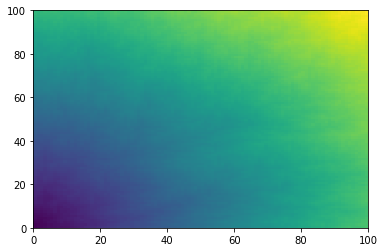

In [27]:
plt.pcolormesh(tdist)

In [ ]:
np.unravel_index()

In [28]:
full_map = np.concatenate([data+k for k in range(5)],axis=0)
full_map = np.concatenate([full_map+k for k in range(5)],axis=1)

In [29]:
full_map[::100,::100]

array([[ 9, 10, 11, 12, 13],
       [10, 11, 12, 13, 14],
       [11, 12, 13, 14, 15],
       [12, 13, 14, 15, 16],
       [13, 14, 15, 16, 17]], dtype=int8)

In [30]:
full_map = ((full_map-1)%9)+1

In [33]:
full_map[::100,::100]

array([[9, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]], dtype=int8)

In [39]:
from tqdm import tqdm

In [47]:
data = full_map
visited = np.zeros(data.shape,dtype='bool')
tdist = np.ones(data.shape)*np.inf
tdist[0,0] = 0
current = (0,0)
with tqdm(total=data.shape[0]**2) as t:
    while True:
        coords = []
        for cidx in [0,1]:
            this_coord = []
            if current[cidx] > 0:
                this_coord.append(current[cidx]-1)
            if current[cidx] < data.shape[cidx]-1:
                this_coord.append(current[cidx]+1)
            coords.append(this_coord)
        rows,cols = coords
        neighbors = []
        for row in rows:
            neighbors.append((row,current[1]))
        for col in cols:
            neighbors.append((current[0],col))
        for row,col in neighbors:
            if not visited[row,col]:
                new_dist = tdist[current[0],current[1]] + data[row,col]
                if new_dist < tdist[row,col]:
                    tdist[row,col] = new_dist
        visited[current[0],current[1]] = True
        if visited[-1,-1]:
            break
        unvisited_dist = np.where(~visited,tdist,np.ones(data.shape)*np.inf)
        current = np.unravel_index(unvisited_dist.argmin(),data.shape)
        t.update(1)
    

100%|█████████████████████████████████▉| 249999/250000 [04:28<00:00, 929.61it/s]


In [48]:
current

(499, 499)

In [49]:
visited.sum()

250000

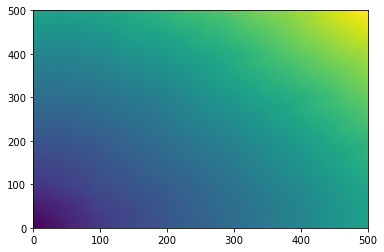

In [51]:
plt.pcolormesh(tdist)

In [71]:
# Try subtracting off the linear slope:
# use meshgrid to create coordinate arrays and then compute the L1 norm.
# multiply by 3 (sqrt of 9?) to get closer to the average slope

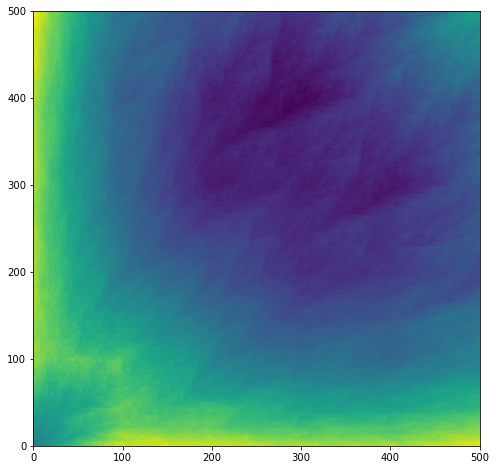

In [70]:
plt.figure(figsize=(8,8))
plt.pcolormesh(tdist-np.linalg.norm(np.meshgrid(np.arange(500),np.arange(500)),axis=0,ord=1)*3)

In [63]:
np.linalg.norm(np.meshgrid(np.arange(500),np.arange(500)),axis=0,ord=2)**2

array([[0.00000e+00, 1.00000e+00, 4.00000e+00, ..., 2.47009e+05,
        2.48004e+05, 2.49001e+05],
       [1.00000e+00, 2.00000e+00, 5.00000e+00, ..., 2.47010e+05,
        2.48005e+05, 2.49002e+05],
       [4.00000e+00, 5.00000e+00, 8.00000e+00, ..., 2.47013e+05,
        2.48008e+05, 2.49005e+05],
       ...,
       [2.47009e+05, 2.47010e+05, 2.47013e+05, ..., 4.94018e+05,
        4.95013e+05, 4.96010e+05],
       [2.48004e+05, 2.48005e+05, 2.48008e+05, ..., 4.95013e+05,
        4.96008e+05, 4.97005e+05],
       [2.49001e+05, 2.49002e+05, 2.49005e+05, ..., 4.96010e+05,
        4.97005e+05, 4.98002e+05]])

In [57]:
np.linalg.norm(np.meshgrid(np.arange(500),np.arange(500)),axis=0).shape

(500, 500)

In [52]:
tdist[-1,-1]

3040.0